In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from a CSV file
data = pd.read_csv('housing.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322       126.0         8.3252            452600.0        NEAR BAY  
1        2401      1138.0         8.3014            358500.0        NEAR BAY  
2         496       177.0         7.2574            352100.0        NEAR BAY  
3         558       219.0         5.6431            341300.0        NEAR BAY  
4         565         NaN         3.8462            342200.0        NEAR BAY

In [3]:
# Display the shape of the dataset "number of rows and columns" 
data.shape

(20640, 10)

In [4]:
# Generates summary statistics for numeric columns
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20429.000000  20640.000000  20636.000000   20640.000000   
mean       537.899848   1425.476744    499.575111       3.870671   
std        421.419669   1132.462122    382.357541       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20638.000000  
mean        206852.449898  
std         115400.700475  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264775.000000  
max         500001.000000

In [5]:
# Displays summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20429 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20636 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20638 non-null  float64
 9   ocean_proximity     20637 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB


### Data Cleaning

In [6]:
# Check for duplicated values 
data.duplicated().sum()

0

In [7]:
# Check for missing values 
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64

In [8]:
# Calculates the median of the 'total_bedrooms' column
median_bedrooms = data['total_bedrooms'].median()

# Fills missing values in 'total_bedrooms' with the calculated median
data['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [9]:
# Check for missing values 
data['total_bedrooms'].isnull().sum()

0

### label encodening

In [10]:
# Imports the preprocessing module from scikit-learn
from sklearn import preprocessing

# Creates a LabelEncoder object to convert categorical labels into numeric form
label_encoder = preprocessing.LabelEncoder()

# Applies label encoding to the 'ocean_proximity' column and updates the DataFrame
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

# Prints the transformed 'ocean_proximity' column with numeric labels
print(data['ocean_proximity'])

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int32


### Outliers

In [11]:
# Create a list representing the numerical columns
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

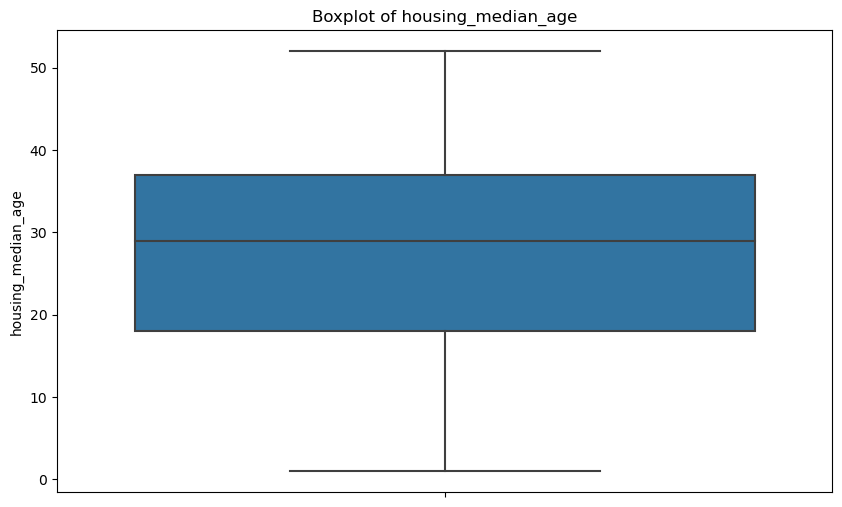

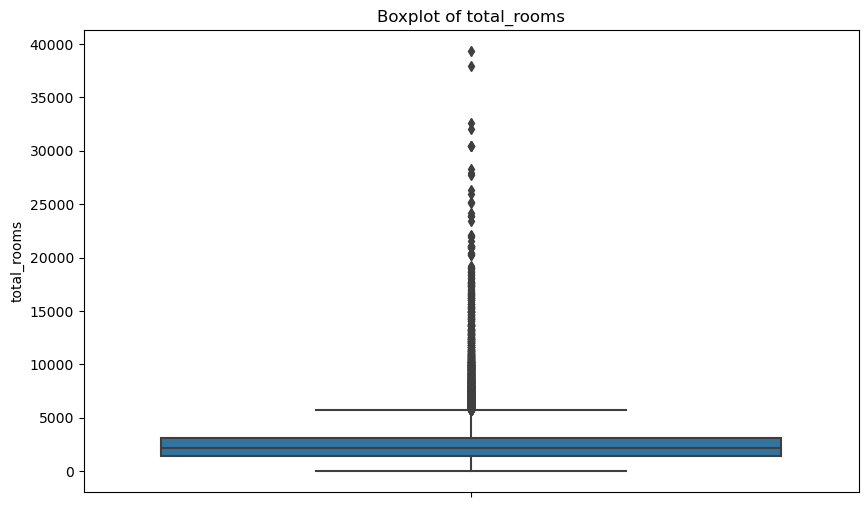

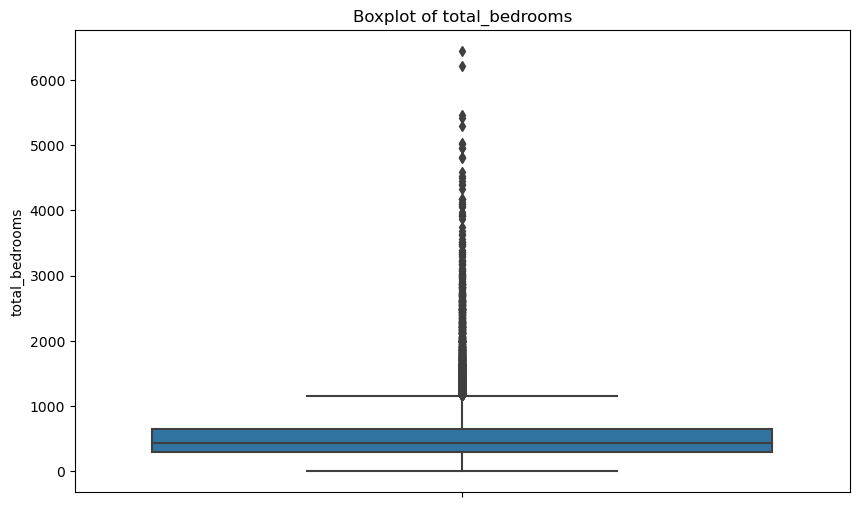

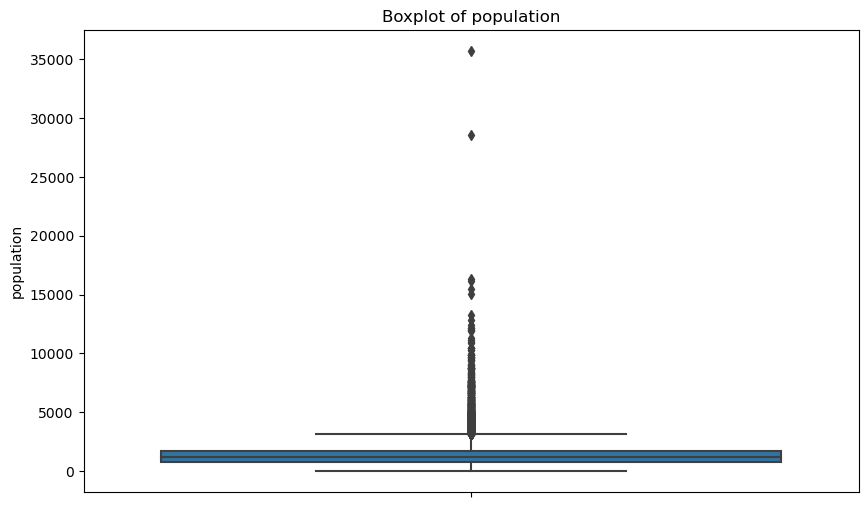

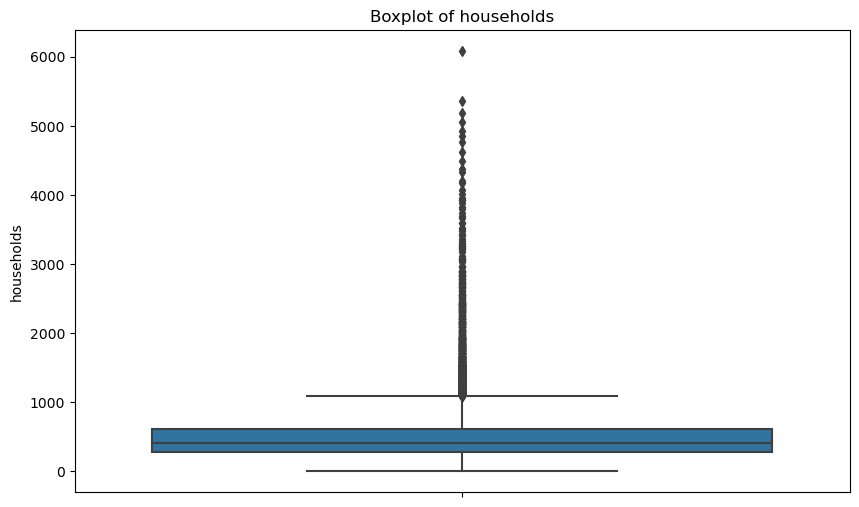

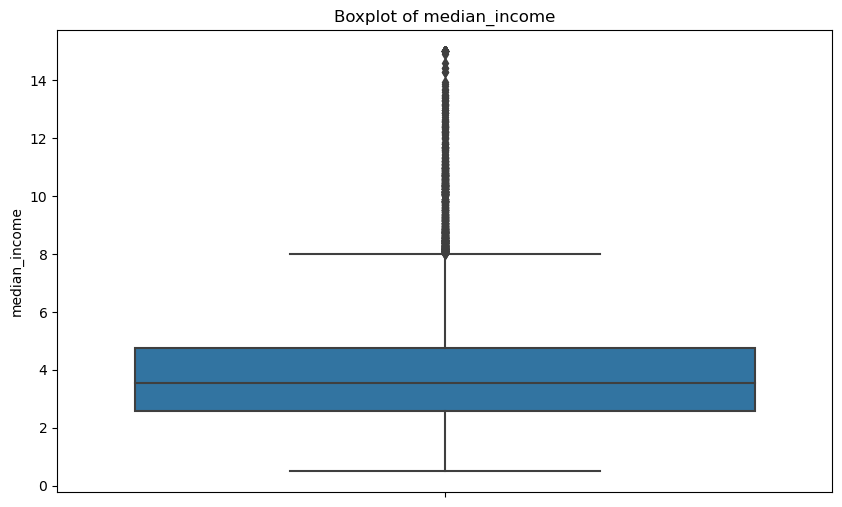

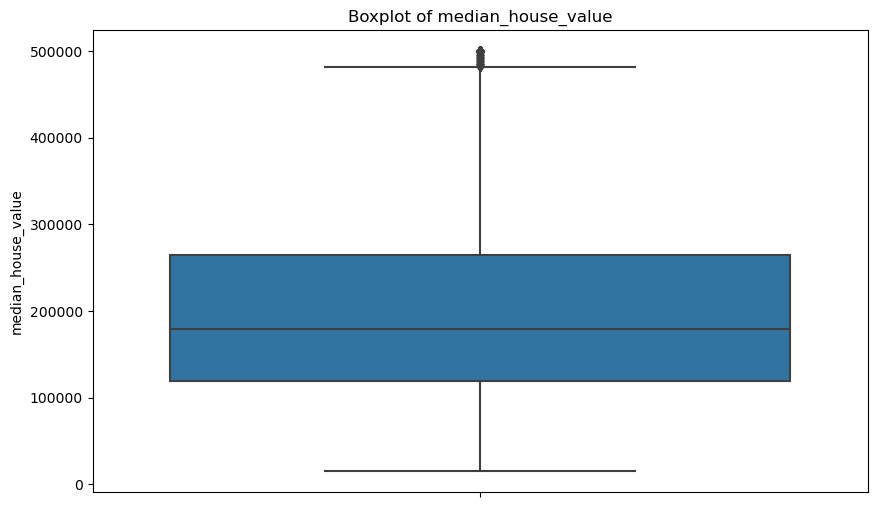

In [12]:
# Iterates over each column in the numerical_columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6)) # Creates a new figure for each boxplot with a specified size
    sns.boxplot(y=data[column]) # Generates a boxplot for the current column
    plt.title(f'Boxplot of {column}') # Sets the title for the boxplot with the column name
    plt.ylabel(column) # Labels the y-axis with the column name
    plt.show() # Displays the boxplot

In [13]:
# Iterate through numerical columns
for column in numerical_columns:
    # Calculate quartiles and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with a value within the outlier boundaries
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

### Normalize

In [14]:
# Imports the MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the numerical data and transform it
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88            0.784314     0.154133        0.110190   
1        -122.22     37.86            0.392157     1.000000        0.951254   
2        -122.24     37.85            1.000000     0.257181        0.162703   
3        -122.25     37.85            1.000000     0.223300        0.201442   
4        -122.25     37.85            1.000000     0.285269        0.240181   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48            0.470588     0.291940        0.321102   
20636    -121.21     39.49            0.333333     0.122007        0.128269   
20637    -121.22     39.43            0.313725     0.395339        0.416658   
20638    -121.32     39.43            0.333333     0.326172        0.351232   
20639    -121.24     39.37            0.294118     0.488556        0.529431   

       population  households  median_income  median_house_value  \
0        0.101950    0.114521       1.000000            0.935968   
1        0.766379    1.000000       1.000000            0.734701   
2        0.157558    0.161246       0.899426            0.721012   
3        0.177373    0.199725       0.684562            0.697913   
4        0.179610         NaN       0.445394            0.699838   
...           ...         ...            ...                 ...   
20635    0.269096    0.301420       0.141140            0.134964   
20636    0.112816    0.103527       0.273774            0.132825   
20637    0.320869    0.395786       0.159734            0.165336   
20638    0.235858    0.318827       0.181988            0.149081   
20639    0.442314    0.484654       0.251387            0.159133   

       ocean_proximity  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
20635                1  
20636                1  
20637                1  
20638                1  
20639                1  

[20640 rows x 10 columns]

### Data Visualization

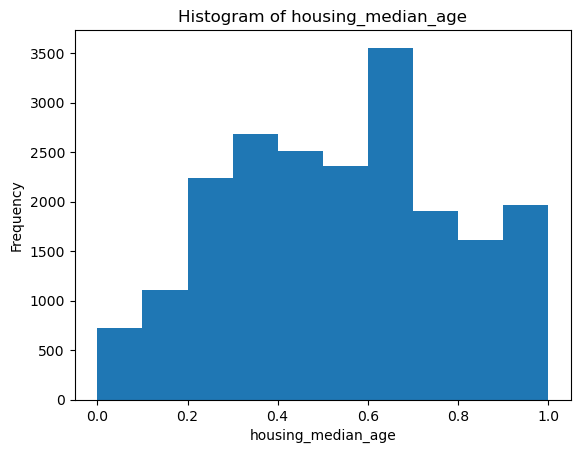

In [15]:
# Plots a histogram to visualize the distribution of the housing_median_age
plt.hist(data['housing_median_age'])
plt.xlabel('housing_median_age')
plt.ylabel('Frequency')
plt.title('Histogram of housing_median_age')
plt.show()

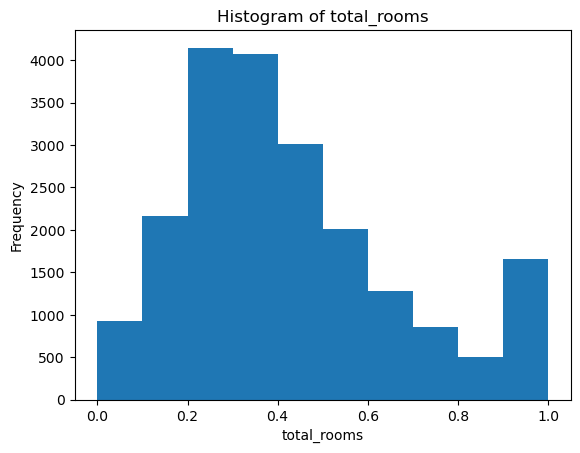

In [16]:
# Plots a histogram to visualize the distribution of the total_rooms
plt.hist(data['total_rooms'])
plt.xlabel('total_rooms')
plt.ylabel('Frequency')
plt.title('Histogram of total_rooms')
plt.show()

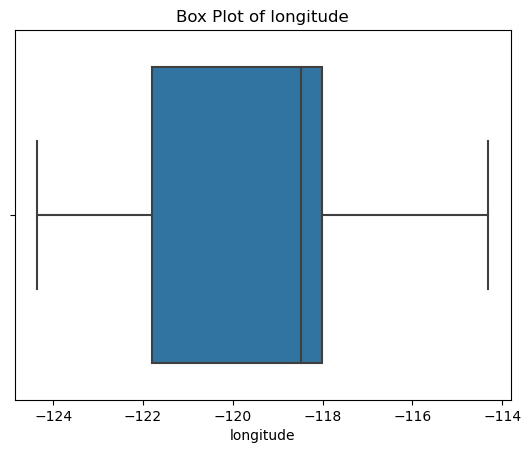

In [17]:
# Creates a box plot to visualize the distribution and identify outliers in the longitude
sns.boxplot(x=data['longitude'])
plt.title('Box Plot of longitude') 
plt.show()  

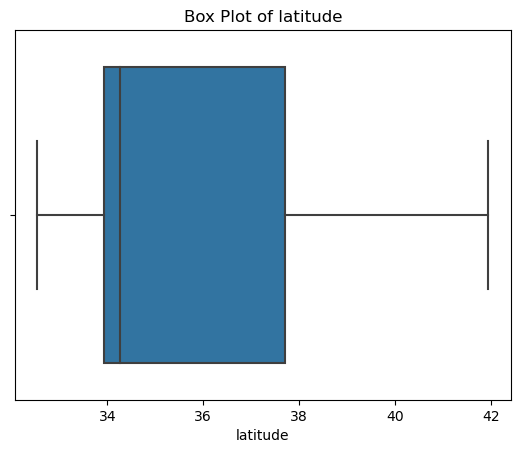

In [18]:
# Creates a box plot to visualize the distribution and identify outliers in the latitude
sns.boxplot(x=data['latitude'])
plt.title('Box Plot of latitude')
plt.show()

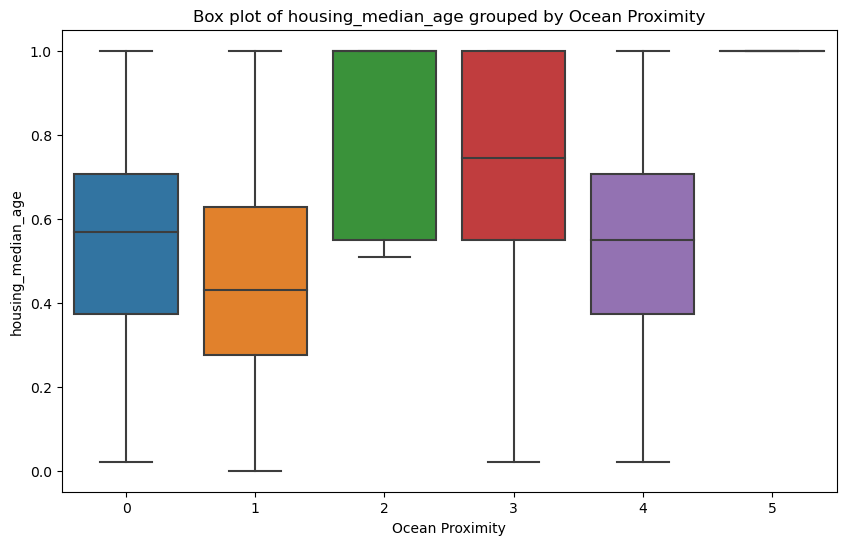

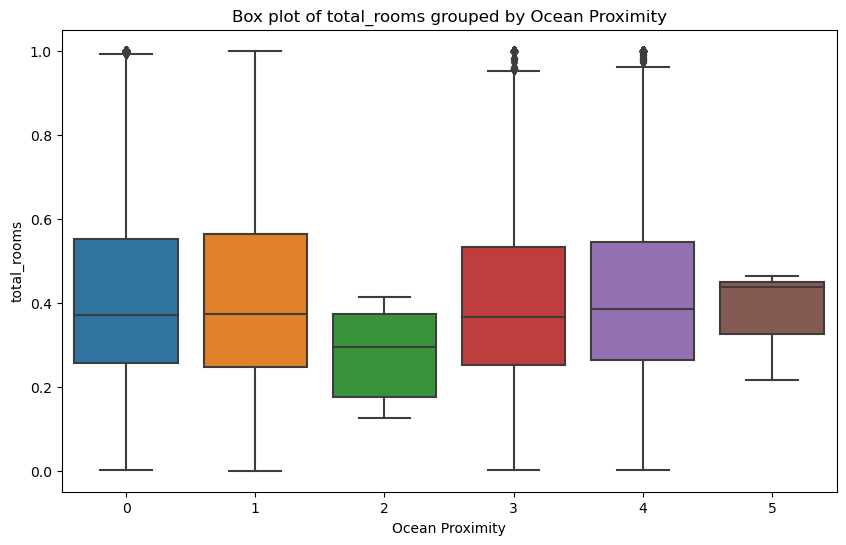

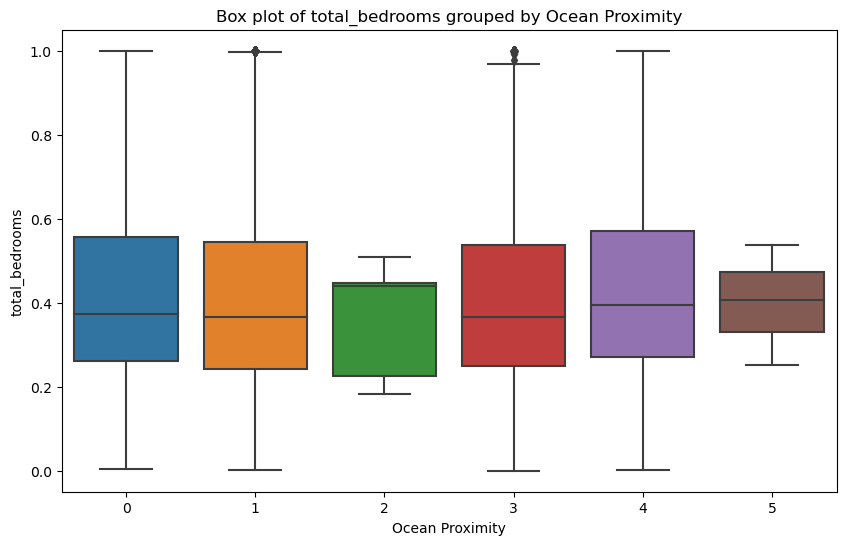

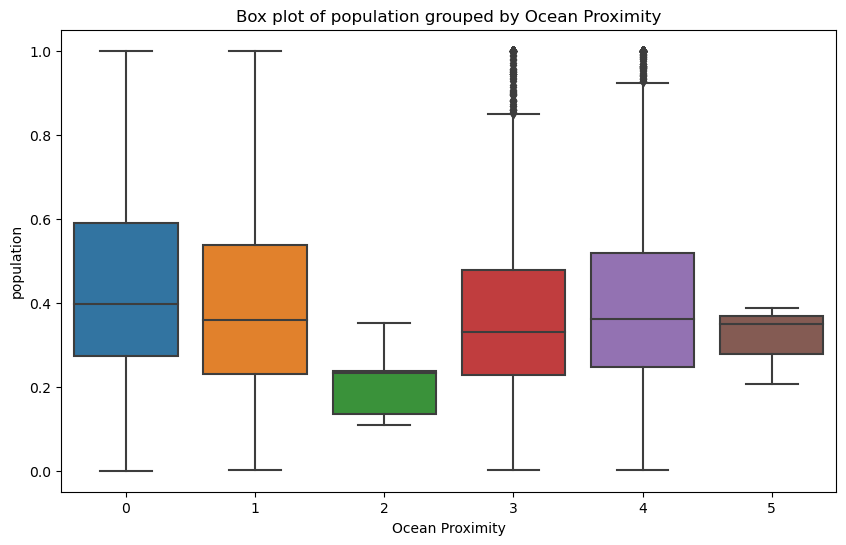

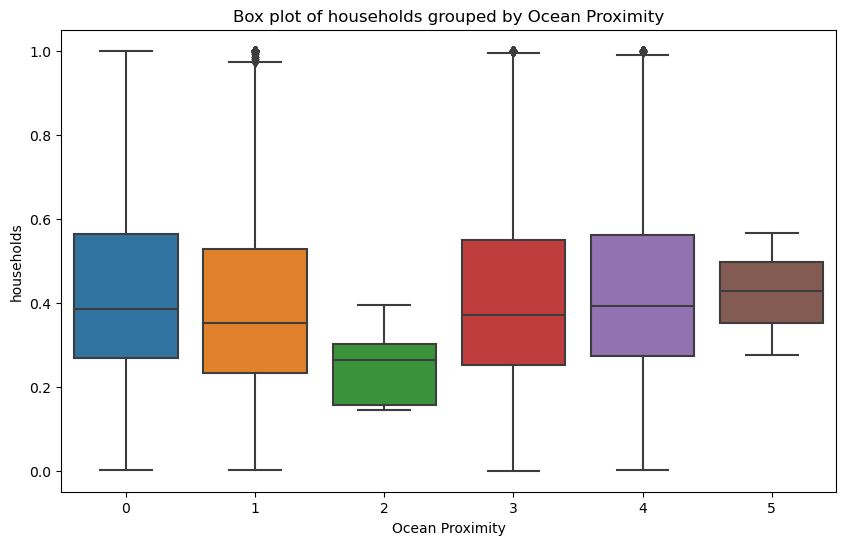

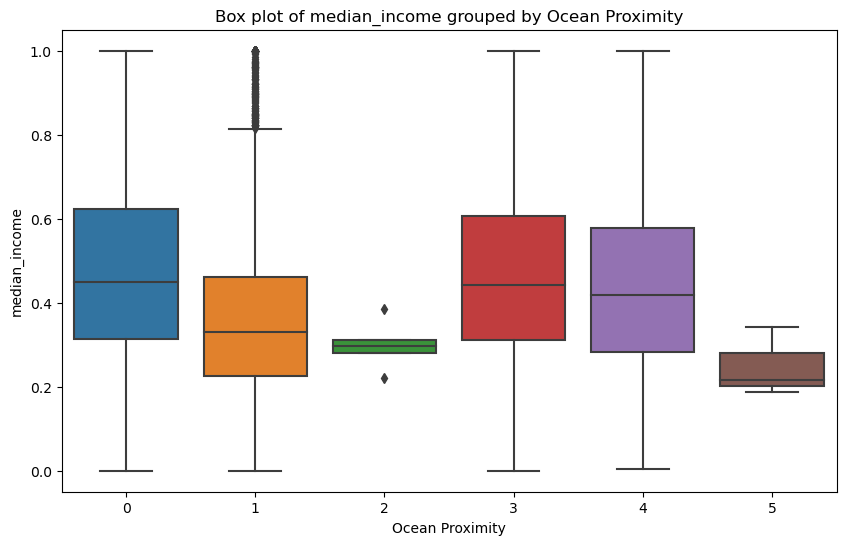

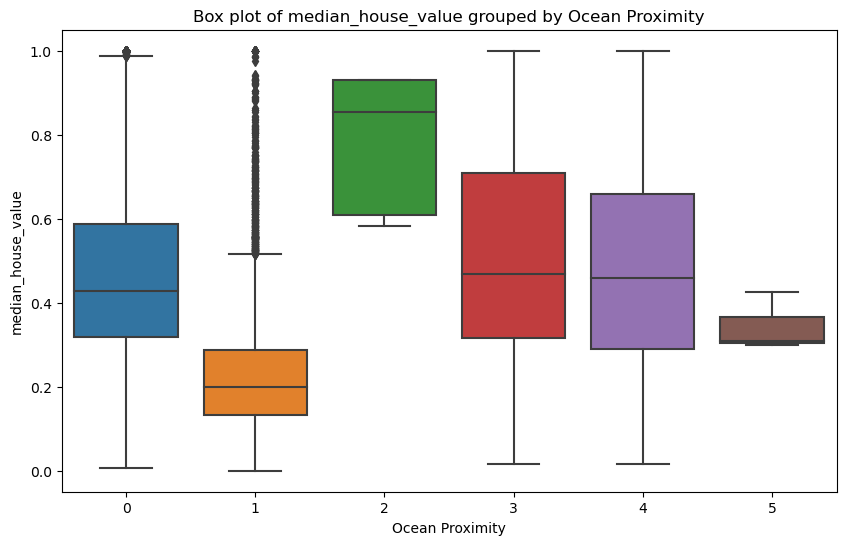

In [19]:
# Iterates over each column in the continuous_columns list 
continuous_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Creates box plots
for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ocean_proximity', y=column, data=data)
    plt.title(f'Box plot of {column} grouped by Ocean Proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel(column)
    plt.show()

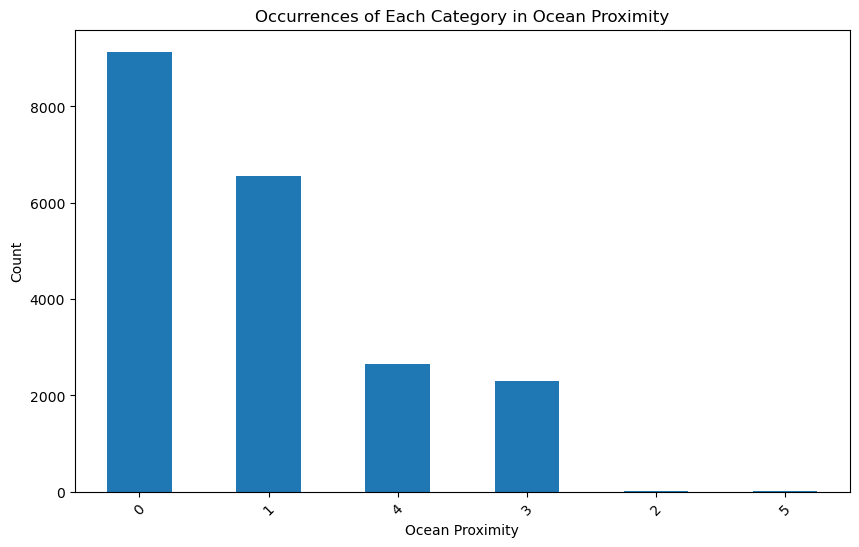

In [20]:
# Calculates the count of each category in the ocean_proximity
category_counts = data['ocean_proximity'].value_counts()

# Creates a bar plot to visualize the occurrences of each category in ocean_proximity
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Occurrences of Each Category in Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

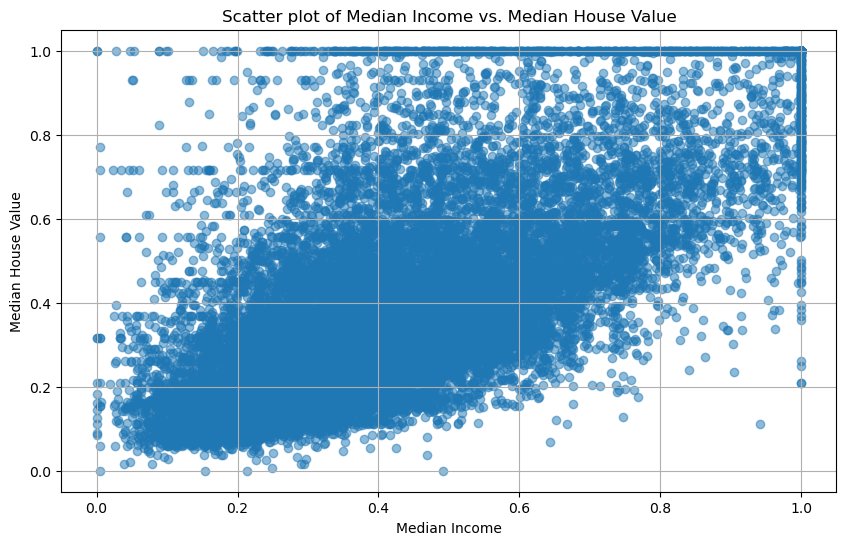

In [21]:
# Creates a scatter plot to visualize the relationship between median_income and median_house_value
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5)
plt.title('Scatter plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

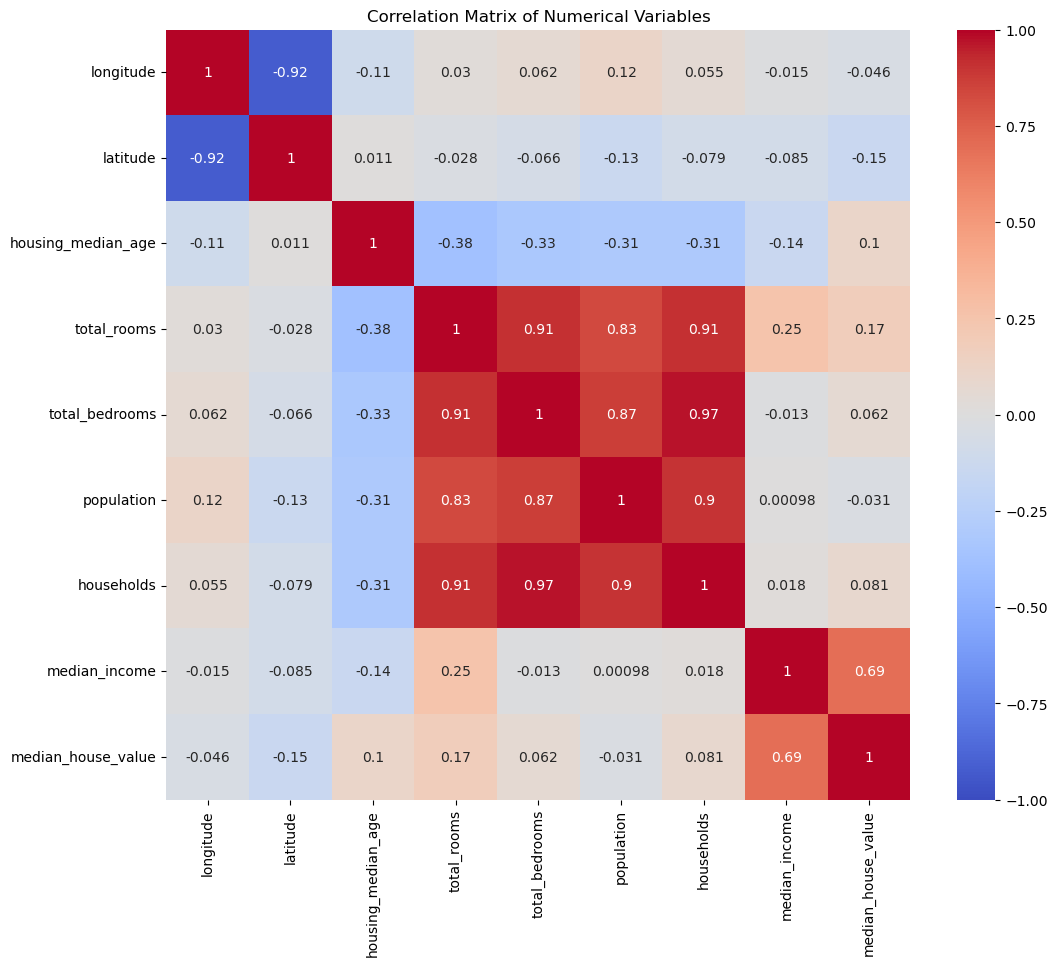

In [22]:
# Selects a subset of numerical columns 
numerical_data = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income',
                       'median_house_value']]

# Calculates the correlation matrix for the selected numerical columns
correlation_matrix = numerical_data.corr()

# Creates a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

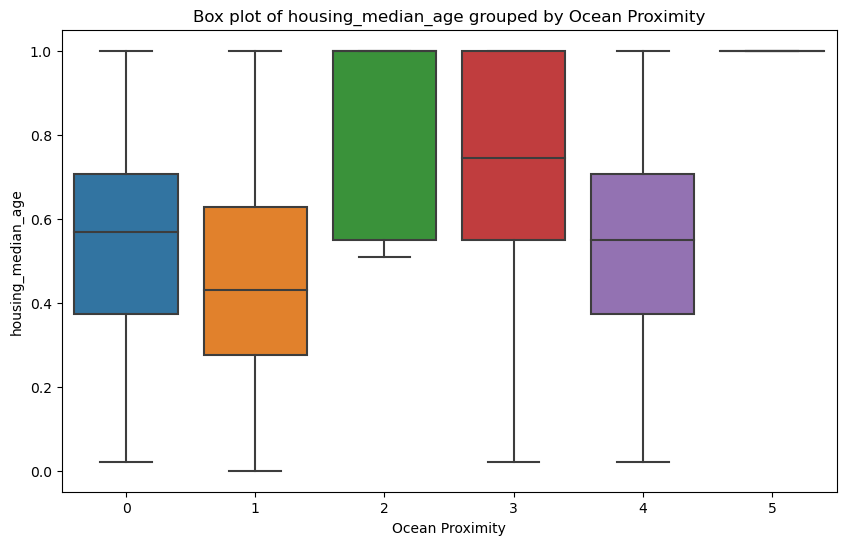

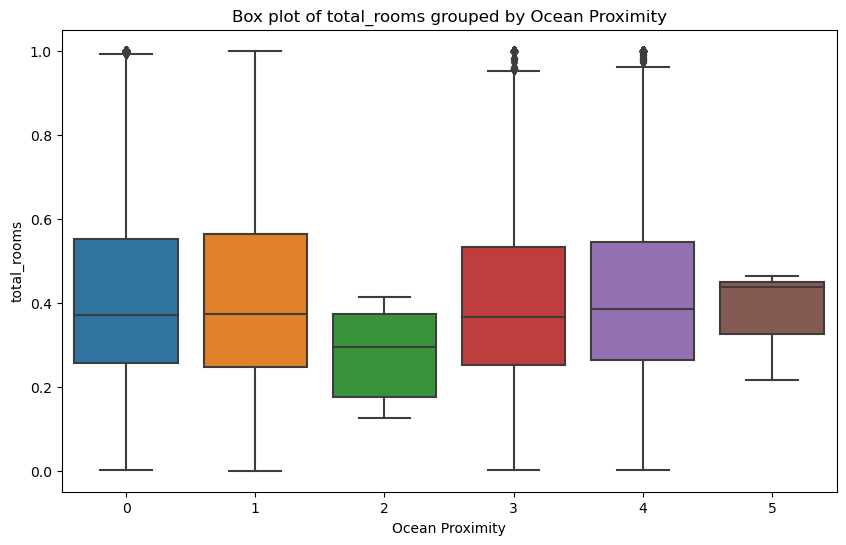

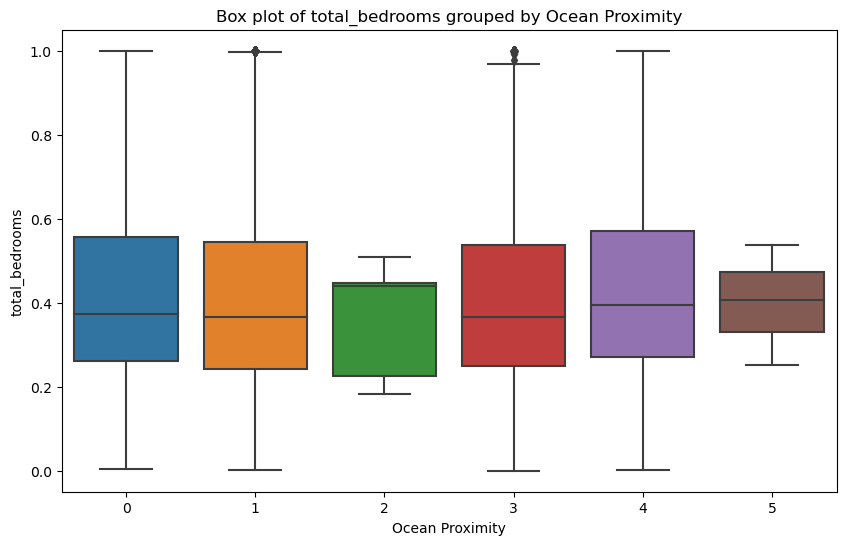

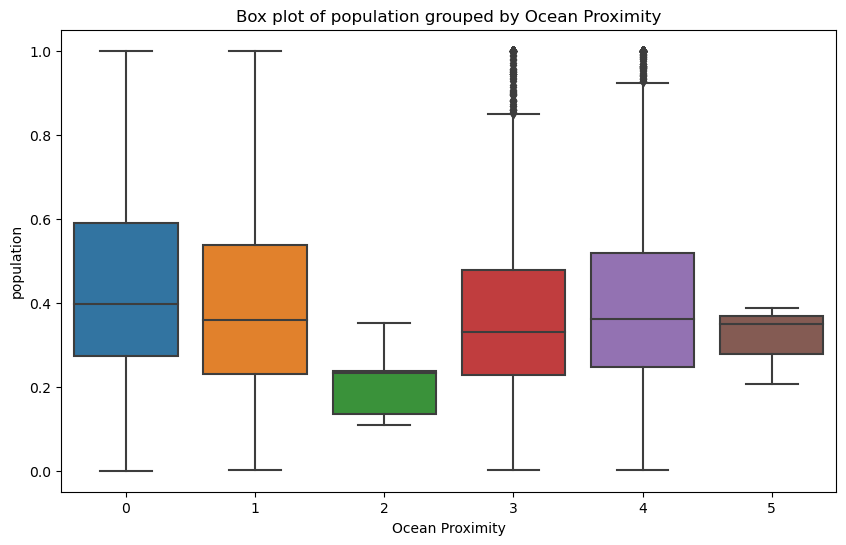

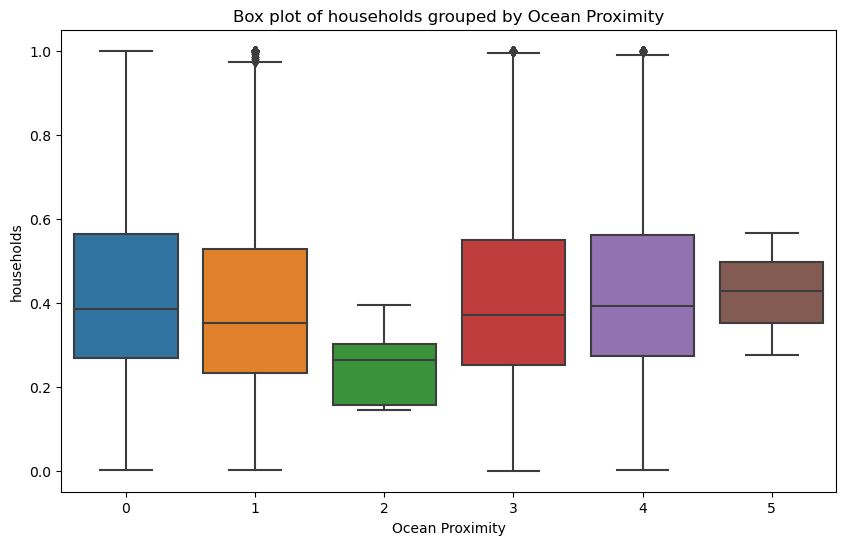

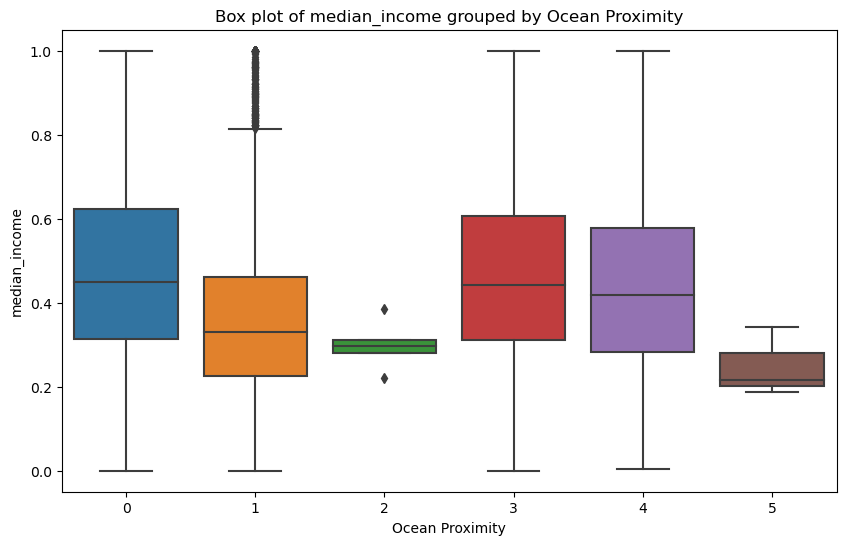

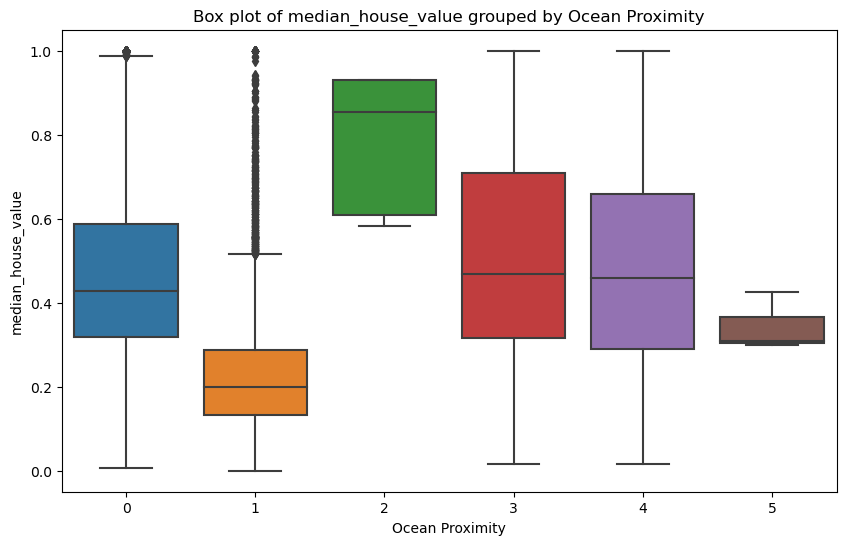

In [23]:
# Selects a subset of numerical columns 
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']

# The box plots show the distribution of each numerical variable, grouped by the ocean_proximity category
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ocean_proximity', y=column, data=data)
    plt.title(f'Box plot of {column} grouped by Ocean Proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel(column)
    plt.show()

C:\Users\pc-touch2023\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


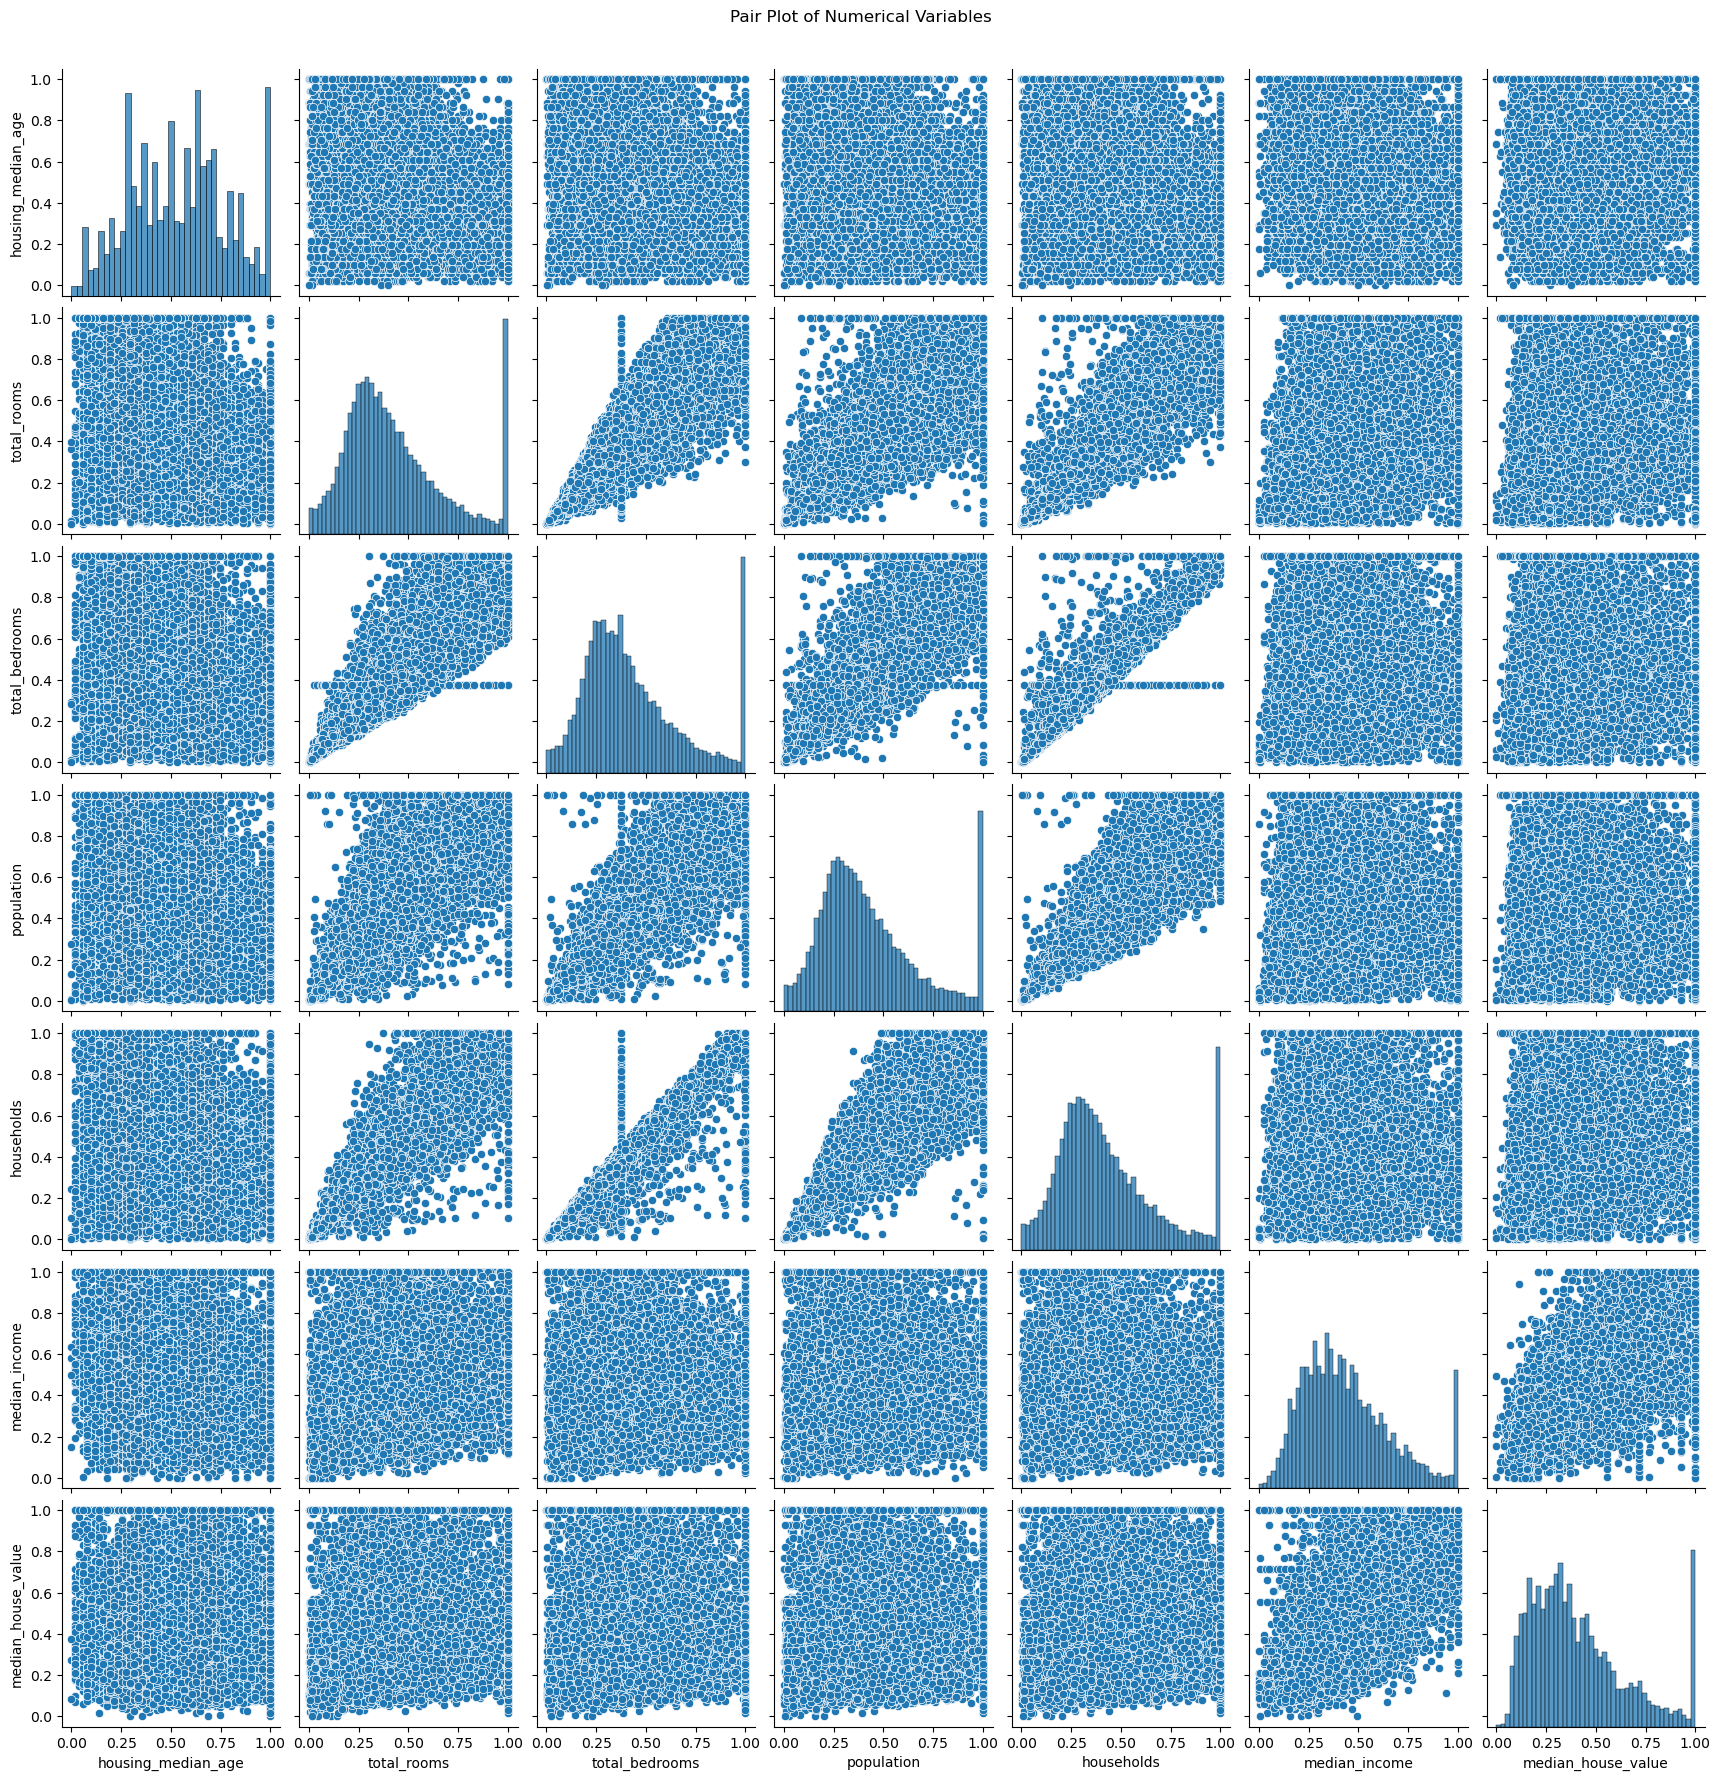

In [24]:
# Selects a subset of numerical columns 
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']

# Creates a pairplot to visualize pairwise relationships between numerical variables
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

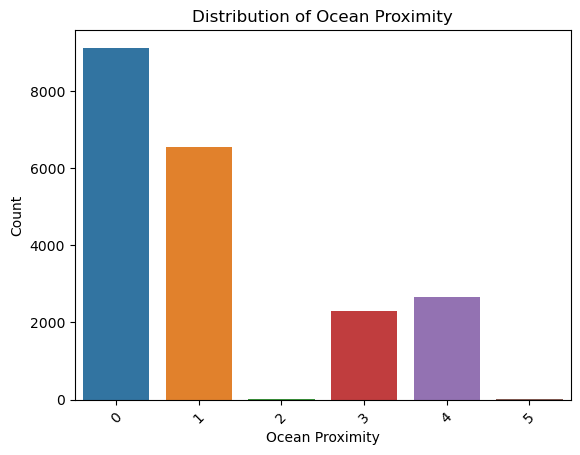

In [25]:
# Creates a count plot to visualize the distribution of the ocean_proximity
sns.countplot(x='ocean_proximity', data=data)
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Distribution of Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Creates a new feature
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Prints a new feature
print(data[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head())

   rooms_per_household  bedrooms_per_room  population_per_household
0             1.345890           0.714905                  0.890223
1             1.000000           0.951254                  0.766379
2             1.594961           0.632640                  0.977130
3             1.118036           0.902114                  0.888085
4                  NaN           0.841944                       NaN


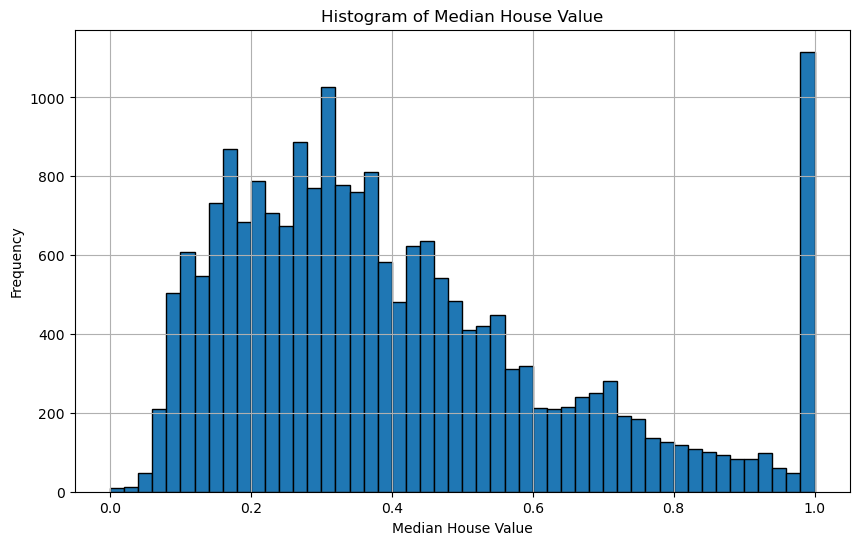

In [27]:
# Plots a histogram to visualize the distribution of median_house_value
plt.figure(figsize=(10, 6))
plt.hist(data['median_house_value'], bins=50, edgecolor='k')
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\pc-touch2023\AppData\Local\Temp\ipykernel_15420\2069813301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['median_house_value'], shade=True)


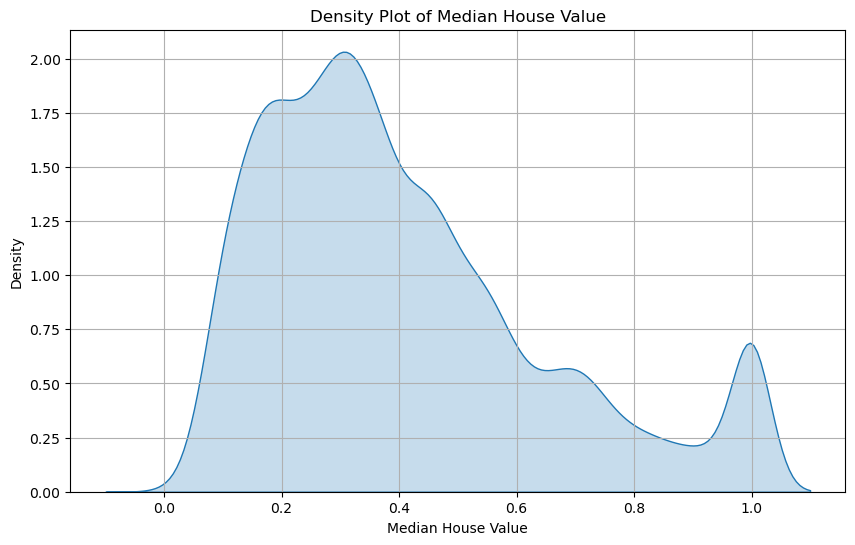

In [28]:
# Plots a density plot to visualize the distribution of median_house_value
plt.figure(figsize=(10, 6))
sns.kdeplot(data['median_house_value'], shade=True)
plt.title('Density Plot of Median House Value')
plt.xlabel('Median House Value')
plt.grid(True)
plt.show()

In [29]:
# Generates and prints summary statistics for the 'median_house_value
summary_stats = data['median_house_value'].describe()
print(summary_stats)

count    20638.000000
mean         0.408491
std          0.242201
min          0.000000
25%          0.223727
50%          0.352273
75%          0.534236
max          1.000000
Name: median_house_value, dtype: float64


### Linear Regression

In [30]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error , mean_squared_error,r2_score

In [31]:
# Drops rows with missing values (if any) from the dataset
data.dropna(inplace=True)

In [32]:
# Initializes the Linear Regression model
linear_regression = LinearRegression()

In [33]:
# Selects the feature columns and target variable
x=data.iloc[:,7:8].values
y=data.iloc[:,8].values

In [34]:
# Splits the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Fits the linear regression model to the training data
linear_regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Makes predictions on the test set
y_pred=linear_regression.predict(X_test)
y_pred

array([0.8326092 , 0.39104948, 0.35380692, ..., 0.81491294, 0.6881229 ,
       0.39403372])

In [36]:
# Predicts the target variable
linear_regression.predict([[9]])

array([6.89233833])

In [37]:
# Evaluates the performance of the linear regression model using the R-squared score
# Calculates the R-squared score directly using the model's predictions on the test set
linear_regression.score(X_test,y_test)

0.4466269345542201

In [38]:
# Evaluates the performance of the linear regression model using the R-squared score
# Manually computes the R-squared score based on actual vs predicted values
reg_score = r2_score(y_test , y_pred)
print('R squared of linear regression :',reg_score)

R squared of linear regression : 0.4466269345542201


In [39]:
# Evaluates the performance of the linear regression model using the Mean Absolute Percentage Error 
mape = mean_absolute_percentage_error(y_test , y_pred)
print("Mean  absolute precentage error of linear regression : ",mape*100,'%')

Mean  absolute precentage error of linear regression :  25804155321313.914 %


### The best fit line

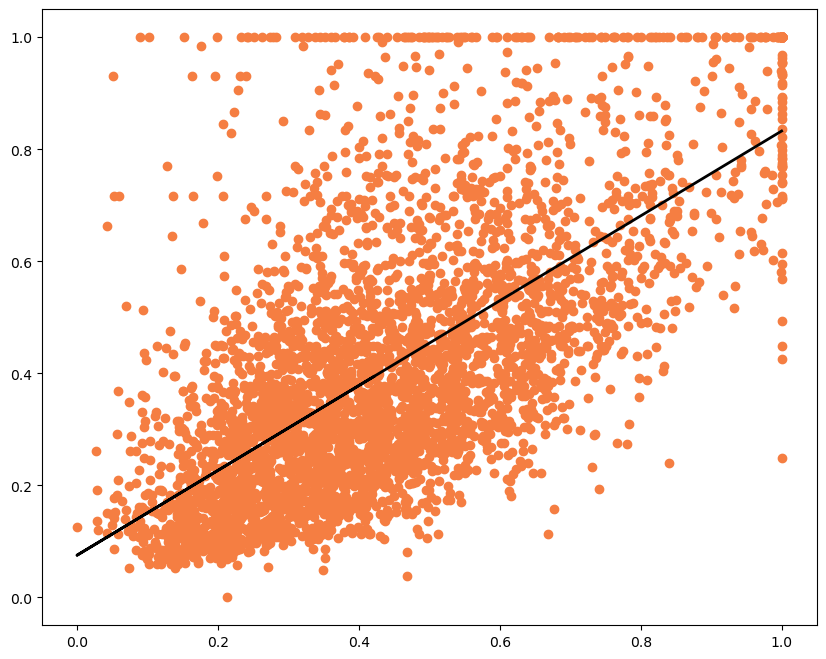

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(X_test, y_test,  color='#f57e42')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.show()